In [20]:
# set imports 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
# read data 
df = pd.read_csv("exampledata/ClassifiedData",index_col=0) # same data, renamed folder and file
print(df.head(3))
print(df.shape)
df.describe()

        WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
(1000, 11)


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [4]:
# additional checks on data
ones = df[df["TARGET CLASS"] > 0]
ones.shape # data is split evenly or use value_counts()
df["TARGET CLASS"].value_counts()
#len(set(df.WTT.unique()))

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [6]:
# scale
scaler = StandardScaler() # StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(df.drop('TARGET CLASS',axis=1)) # fit to get parameters
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1)) # tranform (apply) scaler

In [7]:
# train test split (also shuffles data)
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30, random_state = 79)

In [115]:
#type(X_train), type(scaled_features) # (numpy.ndarray, numpy.ndarray)
#train_test_split?

In [9]:
print(X_train[:2,])
print(X_test[:2,])

[[-0.81688556 -1.49479148 -0.71186678 -0.10088034 -0.85300431 -1.02083657
   0.51716789  0.44664476  0.90640385  0.56243909]
 [-0.5630683  -0.98269676 -0.88946787 -0.83774344  0.46402808 -0.41326011
  -0.88738466 -1.03353612  0.2434662   0.7864487 ]]
[[-1.12319909  1.50266663  0.15486678  0.45088714 -0.12189747  1.8047437
   0.57202009  0.48526962  0.30445868  0.74643699]
 [ 1.67414965  0.30304688 -1.59097799  1.1474472   0.36858737 -0.74754156
  -0.41873649 -1.20621537 -0.53134303  0.42432761]]


In [12]:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=3) # make sure you have at least 3 cpu cores, else set to 1
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=3, n_neighbors=1, p=2,
           weights='uniform')

In [13]:
pred = knn.predict(X_test)

In [14]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[131  15]
 [ 15 139]]
             precision    recall  f1-score   support

          0       0.90      0.90      0.90       146
          1       0.90      0.90      0.90       154

avg / total       0.90      0.90      0.90       300



In [15]:
#======================== plot errors ================
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

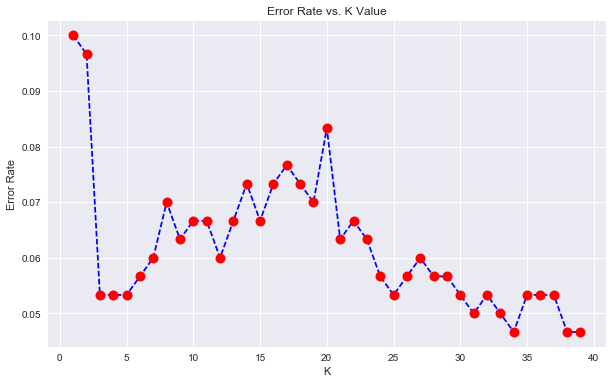

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
# seems 34 neighbors are best. Actually, only for this train test split considering n_neighbors
knn34 = KNeighborsClassifier(n_neighbors=34, n_jobs=3) # make sure you have at least 3 cpu cores, else set to 1
knn34.fit(X_train,y_train)
pred34= knn34.predict(X_test)
print(confusion_matrix(y_test,pred34))
print(classification_report(y_test,pred34))
# this should produce .96 precision but won't hold if we change train/test (solution leaks into model)
# best practice is to use cross validation - see next cells

[[134  12]
 [  2 152]]
             precision    recall  f1-score   support

          0       0.99      0.92      0.95       146
          1       0.93      0.99      0.96       154

avg / total       0.96      0.95      0.95       300



In [21]:
#=============== grid search 

# define a logistic regression classifier with some initial values (set n_jobs to 1 if only one core)
clf  = KNeighborsClassifier( n_jobs=4)

# define a paramter grid (dictionaries) of parameters to try
param_grid = {'n_neighbors': list(range(2,25)),'leaf_size': [10, 20, 30, 40],'weights':['uniform', 'distance']}

# define grid search with validation using 5 folds (stratified by default)
grid_search = GridSearchCV(clf, param_grid, cv=5)

# gridsearch is now a classifier with best parameters
grid_search.fit(X_train, y_train) # gridsearch finds best parameters & fits the whole train data, ready to predict

# print best parameters and best score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# check test score
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test))) # score predicts first

Best parameters: {'leaf_size': 10, 'n_neighbors': 10, 'weights': 'uniform'}
Best cross-validation score: 0.94
Test set score: 0.93


In [22]:
# predict values using optimized model
preds = grid_search.predict(X_test)

# print confusion matrix and performance on test set
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[137   9]
 [ 11 143]]
             precision    recall  f1-score   support

          0       0.93      0.94      0.93       146
          1       0.94      0.93      0.93       154

avg / total       0.93      0.93      0.93       300



In [23]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=10, p=2,
           weights='uniform')
